In [1]:
#data wrangling
import pandas as pd

#datetime
import datetime as dt


In [2]:
# load sheet Transactions trong file KPMG và in ra 5 dòng đầu tiên
Transactions = pd.read_excel ('3. Python_KPMGProject_data.xlsx',sheet_name = 'Transactions')
print (Transactions.head())

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62        

In [3]:
# in ra info bảng
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [4]:
# describe default
Transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [5]:
# describe các biến object
Transactions.describe(include=[object]) 

,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


In [6]:
# describe all
Transactions.describe(include='all', datetime_is_numeric=True)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000,19803,19803,19803,19803,20000.000000,19803.000000,19803.000000
unique,NaN,NaN,NaN,NaN,NaN,2,6,4,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Approved,Solex,Standard,medium,medium,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,19821,4253,14176,13826,12990,NaN,NaN,NaN
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,38199.776549
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,2091.470000,1759.850000,42710.000000


In [7]:
# count số dòng bị null ở mỗi cột
Transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

# 1. Data Correction

## 1.1 Drop NA

In [8]:
# tạo bảng df_dropna_all bằng cách loại bỏ tất cả giá trị null trong bảng và in ra info
df_dropna_all = Transactions.dropna()
print(df_dropna_all.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [9]:
# tạo bảng df_dropna_online_order bằng cách loại bỏ giá trị null trong cột online_order và in ra info
df_dropna_online_order = Transactions.dropna(subset='online_order')
print(df_dropna_online_order.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19640 non-null  int64         
 1   product_id               19640 non-null  int64         
 2   customer_id              19640 non-null  int64         
 3   transaction_date         19640 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             19640 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19640 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

## 1.2 Fill NA

In [10]:
# fill tất cả NA bằng 0, lưu vào bảng df_fillna_0 và in ra info
df_fillna_0 = Transactions.fillna(0) 
print(df_fillna_0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [11]:
# fill NA bằng ffill, lưu vào bảng df_fillna_ffill và in ra info
df_fillna_ffill = Transactions.fillna(method='ffill') 
print(df_fillna_ffill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [12]:
# fill NA bằng bfill, lưu vào bảng df_fillna_bfill và in ra info
df_fillna_bfill = Transactions.fillna(method='bfill') 
print(df_fillna_bfill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

## 1.3. Assess Categorical Data

In [13]:
# load sheet Demographic và hiển thị top head
Demo = pd.read_excel ('3. Python_KPMGProject_data.xlsx', sheet_name='CustomerDemographic', 
                      dtype={'DOB': 'datetime64[ns]'})
print (Demo.head())

   customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                     NaN   
4                                   56 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator  \
0                Health      Mass Customer                  N   
1    Financial Services      Mass Customer                  N   
2              Property

In [14]:
# in ra info bảng
print(Demo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [15]:
# describe các giá trị object
Demo.describe(include=[object])

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
count,4000,3875,4000,3494,3344,4000,4000,3698,4000
unique,3139,3725,6,195,9,3,2,90,2
top,Max,Pristnor,Female,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes
freq,5,3,2037,45,799,2000,3998,113,2024


In [16]:
# Remove all NA rows, then use output for the following steps
Demo_d = Demo.dropna()

In [17]:
# In ra các giá trị unique của cột gender
print(Demo_d.gender.unique())

['F' 'Male' 'Female' 'Femal']


In [18]:
# Quy chuẩn cột gender về 2 nhóm Male và Female, Unisex và in ra giá trị unique mới
Demo_d = Demo_d.replace({'gender': {'F':'Female', 'U': 'Unisex', 'Femal':'Female', 'M':'Male'}})
print(Demo_d.gender.unique())

['Female' 'Male']


In [19]:
# Tính tuổi của mỗi khách hàng và lưu vào cột "age" và in ra min age, max age
Demo_d['age'] = (pd.Timestamp('now') - Demo_d.DOB).astype('timedelta64[Y]')
print('Min age: ' + str(Demo_d.age.min()))
print('Max age: ' + str(Demo_d.age.max()))

Min age: 20.0
Max age: 91.0


In [20]:
# phân nhóm khách hàng dưới 35 tuổi là nhóm "Young", Từ 35 - 55 là "Middle", trên 55 là "Older"
# lưu vào cột "age_group" bằng cách sử dụng hàm cut
Demo_d['age_group'] = pd.cut(Demo_d.age, bins=[1, 34, 55, 100], labels=["Young", "Middle", "Older"])

# 2. Data Completeness

In [21]:
#join bảng transactions vs demographic (đều đã dropna) và in ra những giao dịch thiếu thông tin demographic (last name hoặc first name)
joined = df_dropna_all.merge(Demo_d, on='customer_id', how='left')


In [22]:
print(joined.query('first_name.isnull() or last_name.isnull()'))

       transaction_id  product_id  customer_id transaction_date  online_order  \
4                   5          78          787       2017-10-01           1.0   
7                   8          15         2459       2017-07-15           0.0   
10                 11           5         1986       2017-01-17           0.0   
16                 17          79         2426       2017-04-03           0.0   
24                 25          89         2822       2017-06-11           0.0   
...               ...         ...          ...              ...           ...   
19433           19989           0          714       2017-04-27           1.0   
19436           19992          11         1374       2017-09-14           0.0   
19437           19993          13            5       2017-04-28           0.0   
19438           19994          77         2618       2017-12-23           0.0   
19443           19999           6         2764       2017-07-03           0.0   

      order_status         

# 3. Data Aggregation (after dropping null values)

In [23]:
# tính tổng khách hàng có phát sinh giao dịch bằng hàm nunique
total_customer = joined.customer_id.nunique()
print(total_customer)

3492


In [24]:
# Tính số khách hàng mỗi tháng
# 1: tạo column year_month bằng hàm dt.strftime
joined['year_month'] = joined['transaction_date'].dt.strftime('%Y-%m')

# 2: group by year_month và nunique
joined.groupby("year_month")["customer_id"].nunique()


year_month
2017-01    1321
2017-02    1258
2017-03    1277
2017-04    1284
2017-05    1281
2017-06    1238
2017-07    1327
2017-08    1346
2017-09    1240
2017-10    1378
2017-11    1281
2017-12    1294
Name: customer_id, dtype: int64

In [25]:
# Tính gross margin của mỗi tháng
# 1: tạo column gross_margin
joined['gross_margin'] = (joined['list_price'] - joined['standard_cost']).round(decimals = 2)

# 2: group by year_month và sử dụng hàm agg
gross_mg = joined.groupby("year_month")["gross_margin"].agg(sum)

In [26]:
# Tính số lượng order và doanh thu group by online_order và order_status 
# hint 1: group by online_order, order_status và sử dụng hàm agg
joined.groupby(['online_order','order_status']).agg({"online_order": 'count', 'list_price': sum})


online_order   list_price
online_order order_status                           
0.0          Approved              9631  10666230.05
             Cancelled               75     86837.88
1.0          Approved              9642  10670179.59
             Cancelled               97    108924.20

# 4. Data Visualization

In [27]:
# Sử dụng seaborn và vẽ ra 5 chart khác nhau (column, line, box,...) với đầy đủ tên chart, tên các trục và chú thích.
import seaborn as sns
import matplotlib.pyplot as plt 

      product_line product_class  gross_margin
0         Standard        medium         17.87
1         Standard        medium       1702.55
2         Standard           low       1544.61
3         Standard        medium        817.36
4         Standard        medium       1055.82
...            ...           ...           ...
19440     Standard          high        802.26
19441         Road        medium        104.24
19442     Standard        medium       1592.19
19443     Standard          high         91.15
19444     Standard        medium        195.34

[19445 rows x 3 columns]


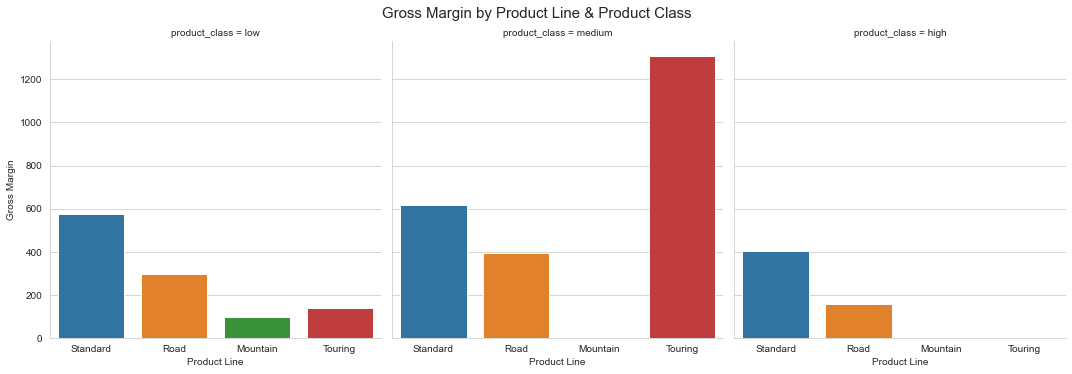

In [28]:
#Bar plot: Gross Margin by Product Line & Product Class
gm_product = joined[['product_line','product_class','gross_margin']] 
print(gm_product)

sns.set_style('whitegrid')
bar = sns.catplot(x='product_line', y='gross_margin', col='product_class', data=gm_product, kind='bar', ci=None,
                  col_order=['low', 'medium', 'high'])
bar.fig.suptitle('Gross Margin by Product Line & Product Class', y=1.03, fontsize=15) 
bar.set(xlabel='Product Line', ylabel='Gross Margin')
plt.show()

      year_month  gender  list_price
7431     2017-01     NaN     1793.43
1576     2017-01  Female     2091.47
1575     2017-01     NaN     1240.31
4590     2017-01  Female     1179.00
1573     2017-01    Male      912.52
...          ...     ...         ...
11489    2017-12  Female     1311.44
11486    2017-12     NaN     1635.30
15620    2017-12    Male     1555.58
2409     2017-12    Male     1071.23
3746     2017-12     NaN      748.17

[19445 rows x 3 columns]


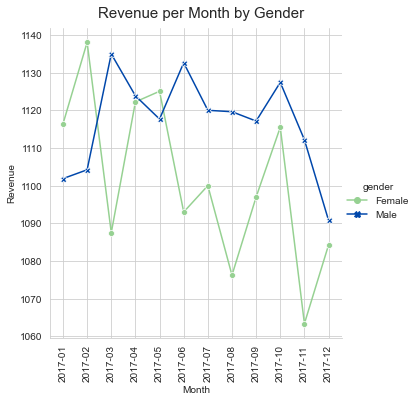

In [29]:
#Line plot: Revenue per Month by Gender
#print(pd.to_datetime(joined.year_month, format='%Y-%m'))
joined = joined.sort_values(by=['year_month'])
revenue_gender = joined[['year_month','gender','list_price']] 
print(revenue_gender)

color_list = ["#96D192", "#0047AB"]
sns.set_palette(palette=color_list)
line = sns.relplot(x='year_month', y='list_price', data=revenue_gender, kind='line', markers=True, 
                   hue='gender', style='gender', dashes=False, ci=None)
line.fig.suptitle('Revenue per Month by Gender', y=1.03, fontsize=15) 
line.set(xlabel='Month', ylabel='Revenue')
plt.xticks(rotation=90)
plt.show()

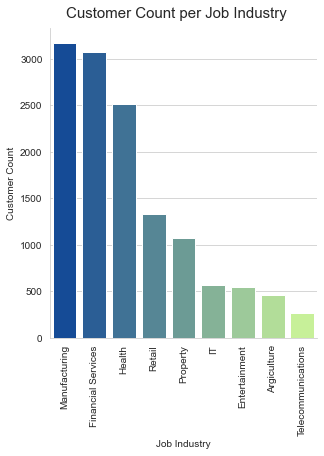

In [30]:
#Count plot: Customer Count per Job Industry
color_list = ["#0047AB","#195EA7","#3275A3","#4B8C9F","#64A39B","#7DBA96","#96D192","#AFE88E","#C8FF8A"]
sns.set_palette(palette=color_list)
count = sns.catplot(x='job_industry_category', data=joined, kind='count', 
                    order=joined.job_industry_category.value_counts().index)
count.fig.suptitle('Customer Count per Job Industry', y=1.03, fontsize=15) 
count.set(xlabel='Job Industry', ylabel='Customer Count')
plt.xticks(rotation=90)
plt.show()

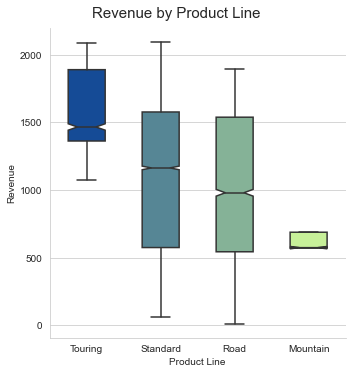

In [31]:
#Box plot: Revenue by Product Line
color_list2 = ["#0047AB","#4B8C9F","#7DBA96","#C8FF8A"]
sns.set_palette(palette=color_list2)
my_order = joined.groupby(by=["product_line"])["list_price"].median().iloc[::-1].index
box = sns.catplot(x='product_line', y='list_price', data=joined, kind='box', order=my_order, notch=True, width=0.5)
box.fig.suptitle('Revenue by Product Line', y=1.03, fontsize=15) 
box.set(xlabel='Product Line', ylabel='Revenue')

plt.show()

      product_line product_class  gross_margin
7431      Standard           low       1544.61
1576      Standard        medium       1702.55
1575          Road        medium        445.21
4590      Standard          high        471.60
1573      Standard        medium        771.12
...            ...           ...           ...
11489     Standard        medium        144.26
11486     Standard        medium        641.64
15620     Standard        medium        737.57
2409      Standard        medium        690.49
3746      Standard          high        299.27

[19445 rows x 3 columns]


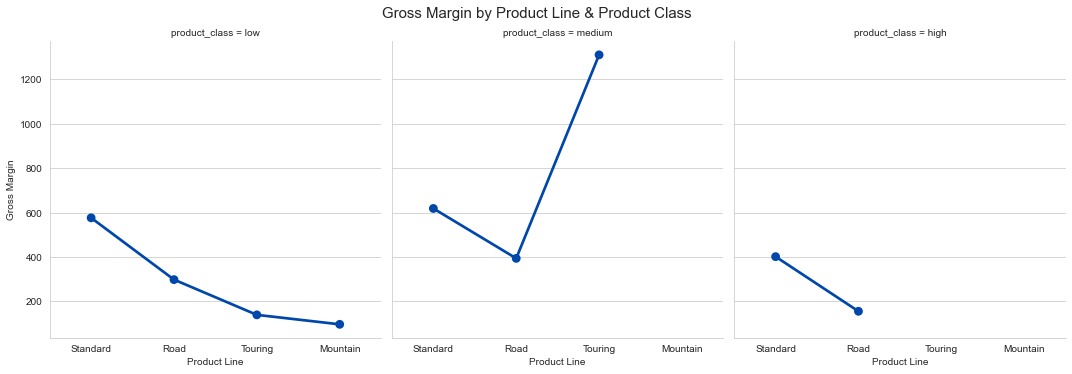

In [32]:
#Point plot: Gross Margin by Product Line & Product Class
gm_product = joined[['product_line','product_class','gross_margin']] 
print(gm_product)

point = sns.catplot(x='product_line', y='gross_margin', col='product_class', data=gm_product, kind='point', ci=None,
                  col_order=['low', 'medium', 'high'])
point.fig.suptitle('Gross Margin by Product Line & Product Class', y=1.03, fontsize=15) 
point.set(xlabel='Product Line', ylabel='Gross Margin')
plt.show()